In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [47]:
# Define Excel File path
file_path = r"C:\Users\oluwa\Documents\Customer Churn Project\prediction_data.xlsx"
sheet_name = "vw_ChurnData"

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path,sheet_name=sheet_name)
# Drop columns that won't be used for prediction
data = data.drop(columns = ['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]
# Use the defined list for cleaner code
data = pd.get_dummies(data, columns=columns_to_encode, drop_first=True)

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})
#Drop NaN Values
data.dropna(subset=['Customer_Status'], inplace=True) 

# Identify numerical columns that might have NaNs (like 'Total_Charges')
# and replace NaNs with the median value for robustness.
for col in data.select_dtypes(include=['number']).columns:
    if data[col].isnull().any():
        data[col] = data[col].fillna(data[col].median())

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [49]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=31)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=31)

Confusion Matrix:
[[798  43]
 [149 212]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       841
           1       0.83      0.59      0.69       361

    accuracy                           0.84      1202
   macro avg       0.84      0.77      0.79      1202
weighted avg       0.84      0.84      0.83      1202



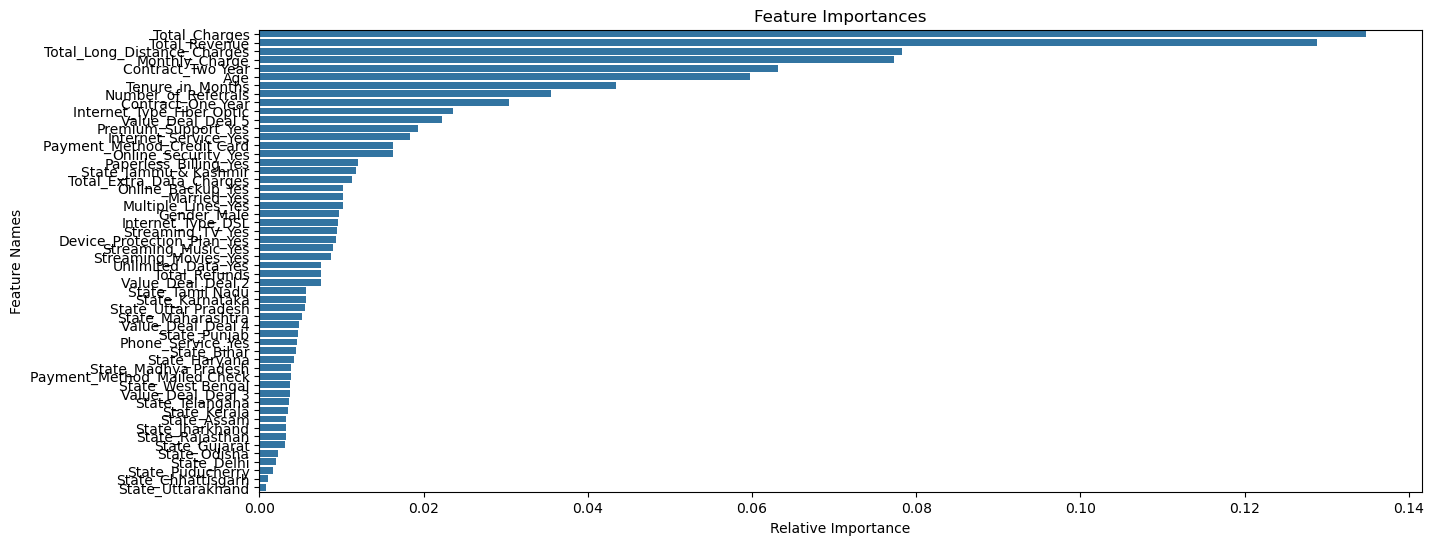

In [50]:
#Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [53]:
#Predict with New Data
# Define the path to the Joiner Data Excel file
file_path = r"C:\Users\oluwa\Documents\Customer Churn Project\prediction_data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_joinData'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"C:\Users\oluwa\Documents\Customer Churn Project\Predictions.csv", index=False)


  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                20        NaN           Yes             No  ...   
2                35        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                10        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdrawal      90.4

NameError: name 'label_encoders' is not defined

In [53]:
#Predict with New Data
# Define the path to the Joiner Data Excel file
file_path = r"C:\Users\oluwa\Documents\Customer Churn Project\prediction_data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_joinData'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"C:\Users\oluwa\Documents\Customer Churn Project\Predictions.csv", index=False)


  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                20        NaN           Yes             No  ...   
2                35        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                10        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdrawal      90.4

NameError: name 'label_encoders' is not defined

In [54]:
# Define Excel File path
file_path = r"C:\Users\oluwa\Documents\Customer Churn Project\prediction_data.xlsx"
sheet_name = 'vw_joinData'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Retain the original DataFrame and Customer_ID before encoding
original_data = new_data.copy()
customer_ids = new_data['Customer_ID']

# Drop columns that are irrelevant or target-related (which shouldn't exist yet)
# We use errors='ignore' in case any of these columns are missing in the new data
columns_to_drop = ['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason']
new_data = new_data.drop(columns=columns_to_drop, errors='ignore')

# List of columns to be One-Hot Encoded (MUST MATCH TRAINING DATA!)
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# 👇 CRITICAL FIX: Use One-Hot Encoding (pd.get_dummies) just like the training data
new_data = pd.get_dummies(new_data, columns=columns_to_encode, drop_first=True)

# 👇 FIX: Handle remaining NaNs in features (Impute using the new data's median as a proxy)
for col in new_data.select_dtypes(include=['number']).columns:
    if new_data[col].isnull().any():
        new_data[col] = new_data[col].fillna(new_data[col].median())

# -------------------------------------------------------------------
# Post-Encoding Alignment (Handling column mismatch after get_dummies)
# -------------------------------------------------------------------
# Due to different categories in new data vs train data, 
# we need to ensure the columns match the training data (X_train).

# Identify columns missing in new_data that were present in X_train
missing_cols = set(X_train.columns) - set(new_data.columns)

# Add missing columns filled with 0 (as these categories did not exist in the new data)
for col in missing_cols:
    new_data[col] = 0

# Ensure the columns are in the EXACT SAME ORDER as X_train
new_data = new_data[X_train.columns]

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions
original_data['Prediction_Label'] = original_data['Customer_Status_Predicted'].map({0: 'Stayed', 1: 'Churned'})

# Filter the DataFrame to include only records predicted as "Churned"
churn_predictions = original_data[original_data['Customer_Status_Predicted'] == 1].copy()

# Save the results
churn_predictions.to_csv(r"C:\Users\oluwa\Documents\Customer Churn Project\Predictions.csv", index=False)

print("Predictions for potential churners saved successfully!")


Predictions for potential churners saved successfully!
